In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
antenna_conf= "2-2-0-5-6"
diff = [6,0]

In [109]:
data = pd.read_json("./folder/data.json")
data = data[data["Switch Order"] == antenna_conf]
#data = data[data["TAG"] != "B"]
data = data[data["rssi"] >-70]
del data["level_0"]
del data["index"]
data=data.reset_index()
data

index                        timestamp  rssi  frequency  \
0      9096 2024-08-22 15:16:16.275000+00:00   -67       2426   
1      9097 2024-08-22 15:16:16.779000+00:00   -58       2402   
2      9098 2024-08-22 15:16:17.292000+00:00   -62       2480   
3      9099 2024-08-22 15:16:17.797000+00:00   -65       2426   
4      9100 2024-08-22 15:16:18.251000+00:00   -61       2480   
...     ...                              ...   ...        ...   
9206  18957 2024-08-23 10:24:15.812000+00:00   -55       2402   
9207  18958 2024-08-23 10:24:16.305000+00:00   -56       2426   
9208  18959 2024-08-23 10:24:16.820000+00:00   -62       2480   
9209  18960 2024-08-23 10:24:17.334000+00:00   -63       2480   
9210  18961 2024-08-23 10:24:17.839000+00:00   -55       2402   

                                                     iq Switch Order  Angle  \
0     [-142, -137, 120, -126, 126, 139, -167, 104, -...    2-2-0-5-6      0   
1     [-80, 141, -131, -103, 101, -130, 118, 114, -1...    2-2-0-5-6      0   
2     [-191, 41, -39, -193, 189, -37, 18, 189, -200,...    2-2-0-5-6      0   
3     [-124, 130, -114, -138, 137, -130, 113, 136, -...    2-2-0-5-6      0   
4     [-181, -66, 63, -189, 179, 69, -84, 168, -152,...    2-2-0-5-6      0   
...                                                 ...          ...    ...   
9206  [180, -64, 5, 186, -196, -9, 31, -183, 171, 88...    2-2-0-5-6     90   
9207  [148, 115, -134, 131, -116, -141, 163, -84, 63...    2-2-0-5-6     90   
9208  [-64, 153, -151, -87, 113, -133, 125, 117, -13...    2-2-0-5-6     90   
9209  [-155, -6, 6, -159, 158, 64, -86, 160, -110, -...    2-2-0-5-6     90   
9210  [-142, 104, -55, -164, 190, -47, 34, 178, -186...    2-2-0-5-6     90   

      Antenna TAG  Entrada  
0           1   A        1  
1           1   A        1  
2           1   A        1  
3           1   A        1  
4           1   A        1  
...       ...  ..      ...  
9206        2   C        2  
9207        2   C        2  
9208        2   C        2  
9209        2   C        2  
9210        2   C        2  

[9211 rows x 10 columns]

In [110]:
def phases(iq: np.ndarray,start:int):
    list = []
    for i in range(start,len(iq)-2,6):
        list.append(
            np.angle(complex(iq[i],iq[i+1]))
        )
    return np.array(list)



In [111]:
data["phase_0"] = data["iq"].apply(phases,start=16)
data["phase_5"] = data["iq"].apply(phases,start=18)
data["phase_6"] = data["iq"].apply(phases,start=20)

data

index                        timestamp  rssi  frequency  \
0      9096 2024-08-22 15:16:16.275000+00:00   -67       2426   
1      9097 2024-08-22 15:16:16.779000+00:00   -58       2402   
2      9098 2024-08-22 15:16:17.292000+00:00   -62       2480   
3      9099 2024-08-22 15:16:17.797000+00:00   -65       2426   
4      9100 2024-08-22 15:16:18.251000+00:00   -61       2480   
...     ...                              ...   ...        ...   
9206  18957 2024-08-23 10:24:15.812000+00:00   -55       2402   
9207  18958 2024-08-23 10:24:16.305000+00:00   -56       2426   
9208  18959 2024-08-23 10:24:16.820000+00:00   -62       2480   
9209  18960 2024-08-23 10:24:17.334000+00:00   -63       2480   
9210  18961 2024-08-23 10:24:17.839000+00:00   -55       2402   

                                                     iq Switch Order  Angle  \
0     [-142, -137, 120, -126, 126, 139, -167, 104, -...    2-2-0-5-6      0   
1     [-80, 141, -131, -103, 101, -130, 118, 114, -1...    2-2-0-5-6      0   
2     [-191, 41, -39, -193, 189, -37, 18, 189, -200,...    2-2-0-5-6      0   
3     [-124, 130, -114, -138, 137, -130, 113, 136, -...    2-2-0-5-6      0   
4     [-181, -66, 63, -189, 179, 69, -84, 168, -152,...    2-2-0-5-6      0   
...                                                 ...          ...    ...   
9206  [180, -64, 5, 186, -196, -9, 31, -183, 171, 88...    2-2-0-5-6     90   
9207  [148, 115, -134, 131, -116, -141, 163, -84, 63...    2-2-0-5-6     90   
9208  [-64, 153, -151, -87, 113, -133, 125, 117, -13...    2-2-0-5-6     90   
9209  [-155, -6, 6, -159, 158, 64, -86, 160, -110, -...    2-2-0-5-6     90   
9210  [-142, 104, -55, -164, 190, -47, 34, 178, -186...    2-2-0-5-6     90   

      Antenna TAG  Entrada                                            phase_0  \
0           1   A        1  [-3.1244023699890597, 0.29201954061992613, -2....   
1           1   A        1  [2.5894396631342893, -0.17380111908918636, -2....   
2           1   A        1  [2.2157118618019473, -0.44099776135465124, 3.0...   
3           1   A        1  [1.5459787281772228, -1.1410340476982082, 2.46...   
4           1   A        1  [2.8305943729842524, 0.1959811336361145, -2.68...   
...       ...  ..      ...                                                ...   
9206        2   C        2  [3.141592653589793, 0.9588938923602299, -1.311...   
9207        2   C        2  [-2.1763409903998667, 1.8055189392800937, -0.3...   
9208        2   C        2  [-0.9532040533357405, -3.026716048172894, 0.90...   
9209        2   C        2  [0.5841785304099635, -1.7008277031365882, 2.18...   
9210        2   C        2  [-0.2402672727809385, -2.4844071595590766, 1.6...   

                                                phase_5  \
0     [-2.339560165086297, 1.2942492071802545, -1.48...   
1     [2.5262531117844014, -0.34500217720710513, -3....   
2     [2.918561685218235, 0.20333608402827574, -2.40...   
3     [2.4309448208736515, -0.31213546609693965, -3....   
4     [-2.7297853482280767, 0.8404605587711186, -1.8...   
...                                                 ...   
9206  [0.6479307586687755, -1.554038119212659, 2.602...   
9207  [1.413120336369888, -0.6212445105300607, -3.00...   
9208  [2.8037144653495147, 0.6128202021652414, -1.59...   
9209  [-2.2477111786373736, 2.0971886910213167, -0.1...   
9210  [-2.7154609462428208, 1.2567084576677936, -0.8...   

                                                phase_6  
0     [-2.494920308070028, 1.040504177328581, -1.707...  
1     [2.7041780923641787, -0.02547219651072259, -2....  
2     [-2.4756234162106834, 1.1441688336680205, -1.5...  
3     [2.2930467110880133, -0.4903474940060718, 3.08...  
4     [-1.7590178320996674, 1.5042281630190728, -1.1...  
...                                                 ...  
9206  [-2.1995926132103296, 1.8249807137550402, -0.3...  
9207  [-1.3351024479214708, 2.7682907627771343, 0.48...  
9208  [0.28297689337281756, -1.968670684412066, 2.25...  
9209  [1.61563

In [112]:
fases_50 = data["phase_5"] - data["phase_0"]
fases_50 = (fases_50 + np.pi) % (2 * np.pi) - np.pi
data["fases_50"]=fases_50

In [113]:
def flatten_to_plot(serie,label:str):
    lista = []
    for element in serie:
        lista = [*lista,*element]
    
    labels = [label]*len(lista)
    return labels, lista

In [114]:
l_0,d_0 = flatten_to_plot(data[data["Angle"] == 0]["fases_50"],0)
l_30,d_30 = flatten_to_plot(data[data["Angle"] == 30]["fases_50"],30)
l_60,d_60 = flatten_to_plot(data[data["Angle"] == 60]["fases_50"],60)
l_90,d_90 = flatten_to_plot(data[data["Angle"] == 90]["fases_50"],90)
l_120,d_120 = flatten_to_plot(data[data["Angle"] == 120]["fases_50"],120)
l_150,d_150 = flatten_to_plot(data[data["Angle"] == 150]["fases_50"],150)
l_180,d_180 = flatten_to_plot(data[data["Angle"] == 180]["fases_50"],180)

In [115]:
d_0.sort()
d_30.sort()
d_60.sort()
d_90.sort()
d_120.sort()
d_150.sort()
d_180.sort()

Text(0.5, 1.0, '2-2-0-5-6 Antenas 5-0')

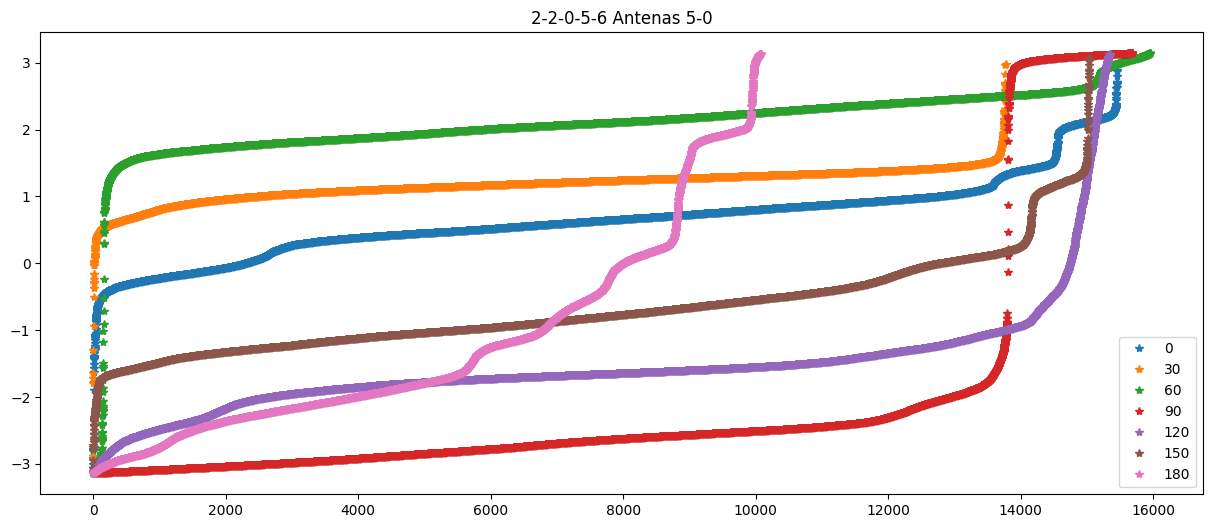

In [116]:
plt.figure(figsize=(15, 6))
plt.plot(d_0,"*")
plt.plot(d_30,"*")
plt.plot(d_60,"*")
plt.plot(d_90,"*")
plt.plot(d_120,"*")
plt.plot(d_150,"*")
plt.plot(d_180,"*")
plt.legend((0,30,60,90,120,150,180))
plt.title("2-2-0-5-6 Antenas 5-0")

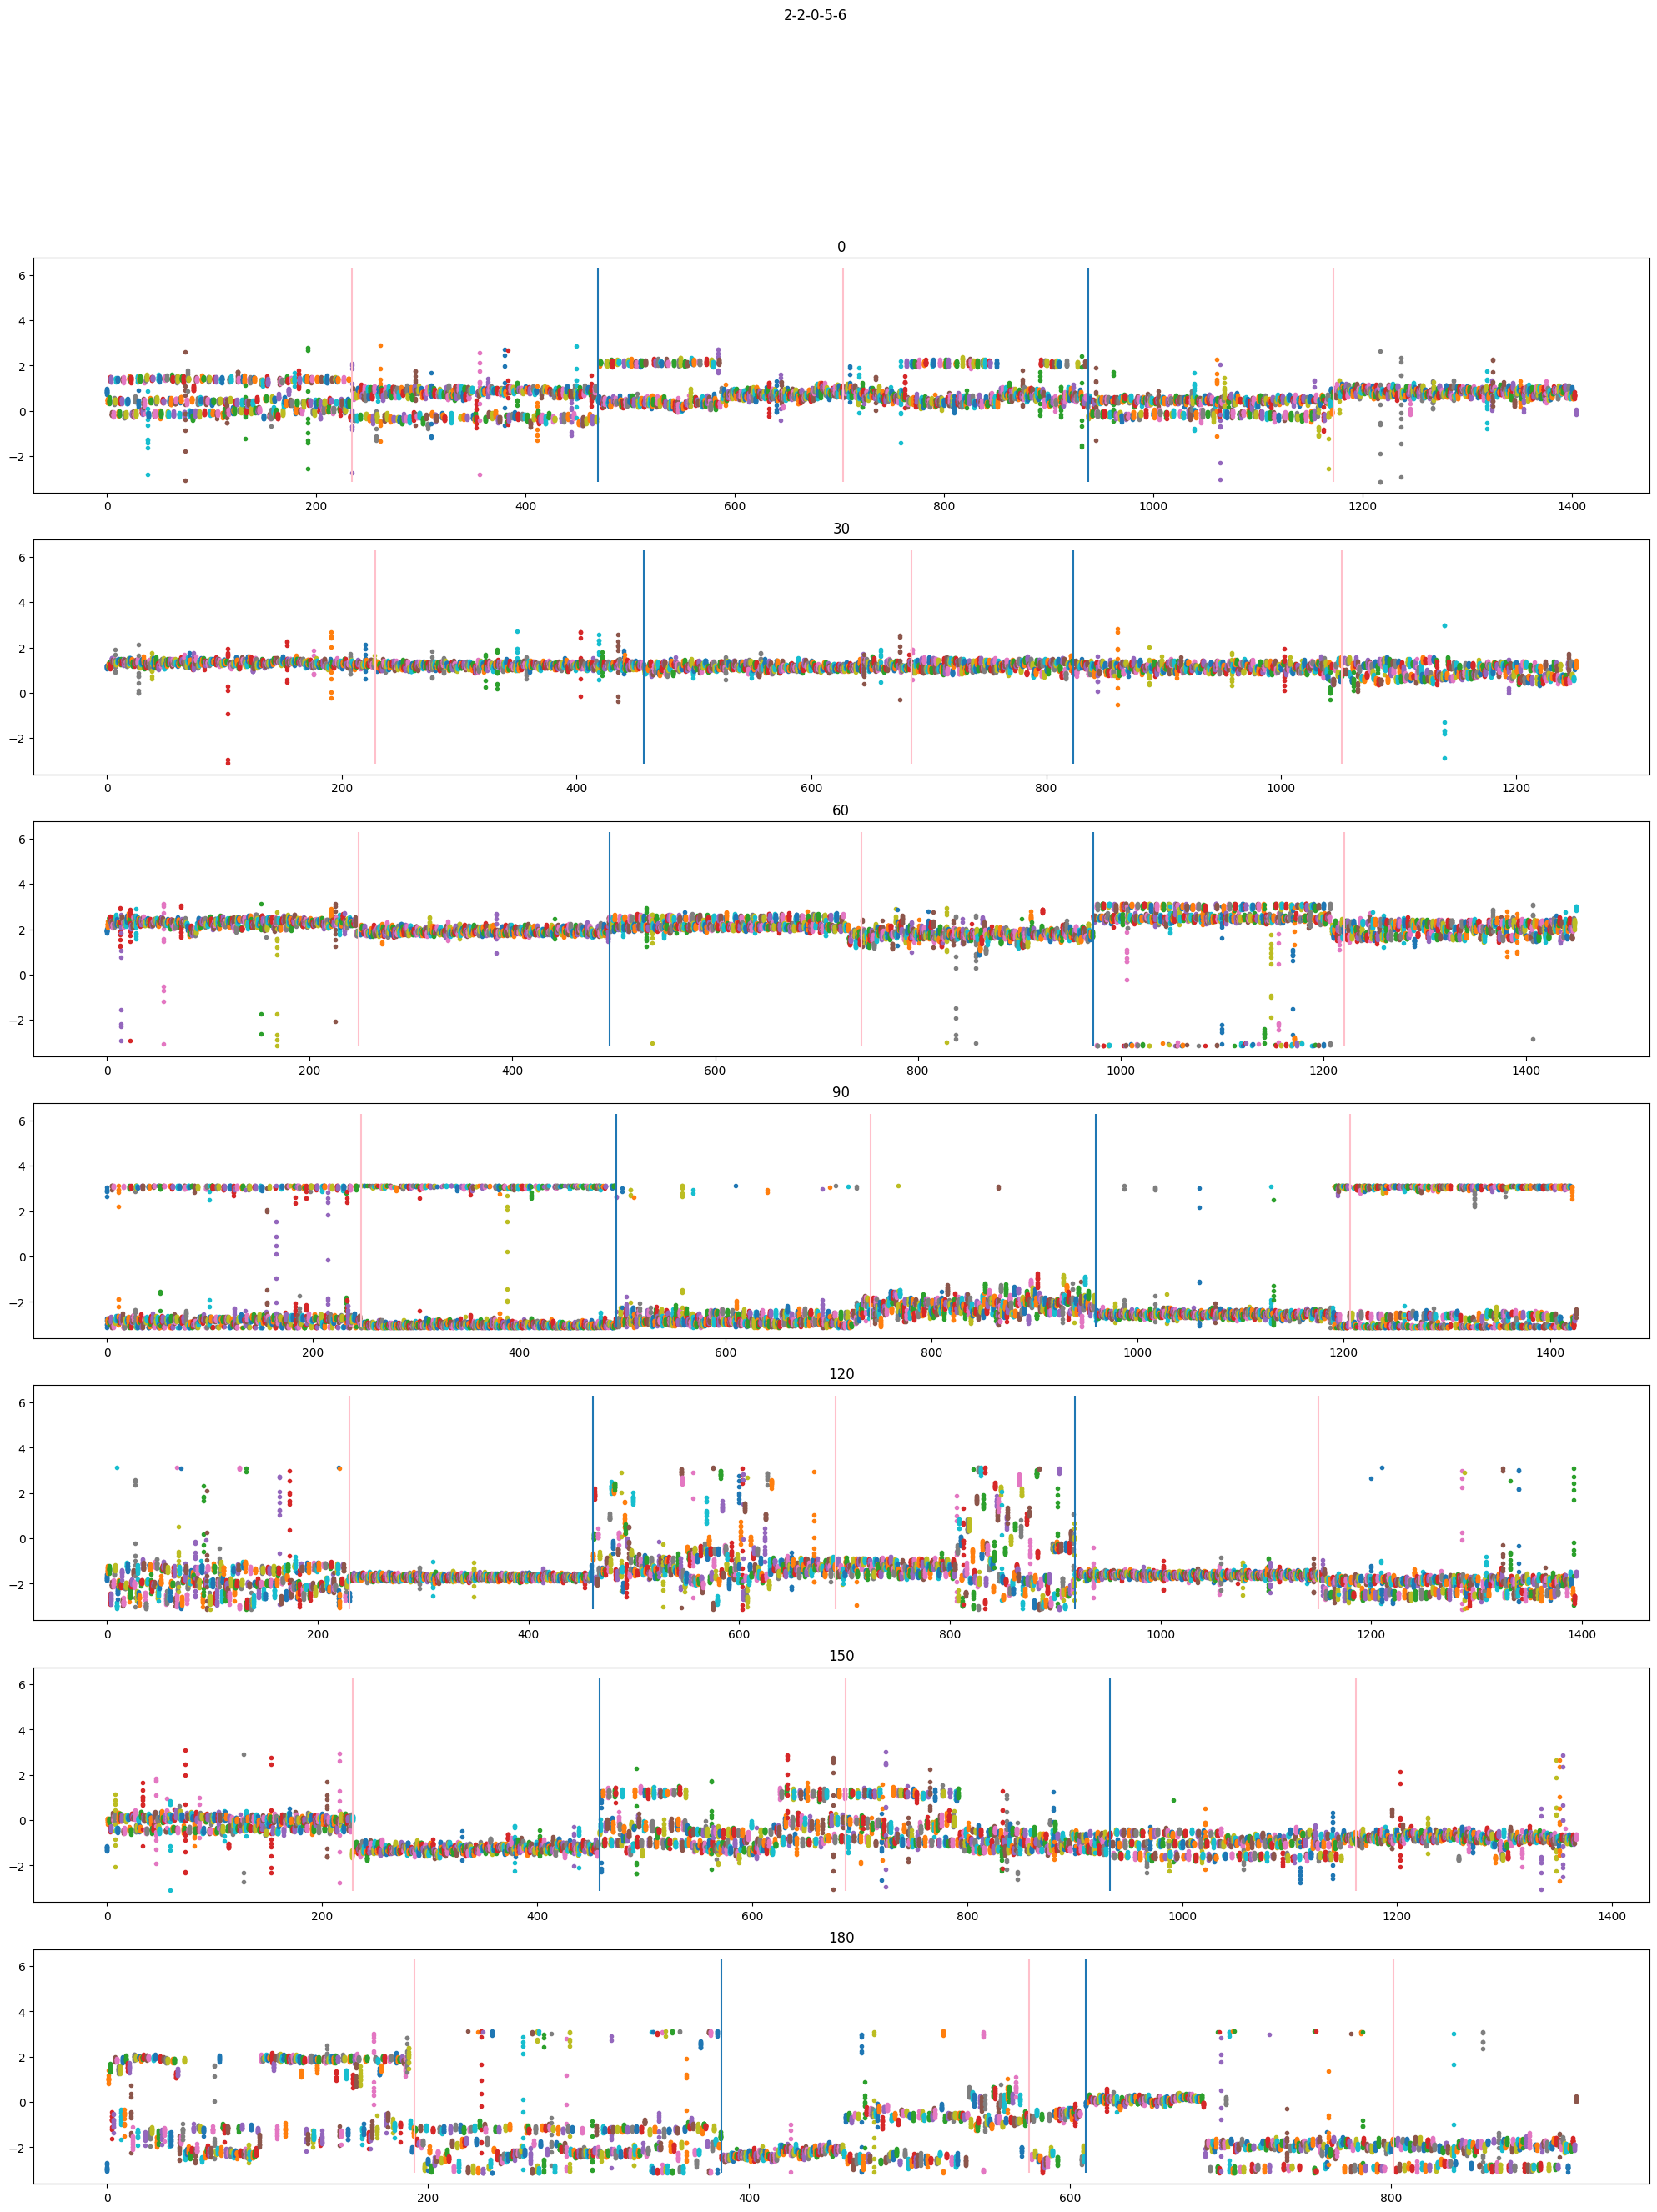

In [117]:
fig, ax = plt.subplots(7,1)
fig.set_figwidth(25)
fig.set_figheight(30)
fig.suptitle(antenna_conf)

for index,angle in enumerate((0,30,60,90,120,150,180)):
    d=data[data["Angle"] == angle].sort_values("TAG").reset_index()
    ab= d[d["TAG"] == "B"].index[0]
    cb= d[d["TAG"] == "C"].index[0]

    d= d["fases_50"]

    for de, i in zip(d,range(d.shape[0])):
        ax[index].plot([i]*len(de),de,".")
    ax[index].set_title(str(angle))
    ax[index].vlines(ab,-np.pi,2*np.pi)
    ax[index].vlines(cb,-np.pi,2*np.pi)
    ax[index].vlines(ab/2,-np.pi,2*np.pi,"pink")
    ax[index].vlines(ab+ab/2,-np.pi,2*np.pi,"pink")
    ax[index].vlines(cb+ab/2,-np.pi,2*np.pi,"pink")




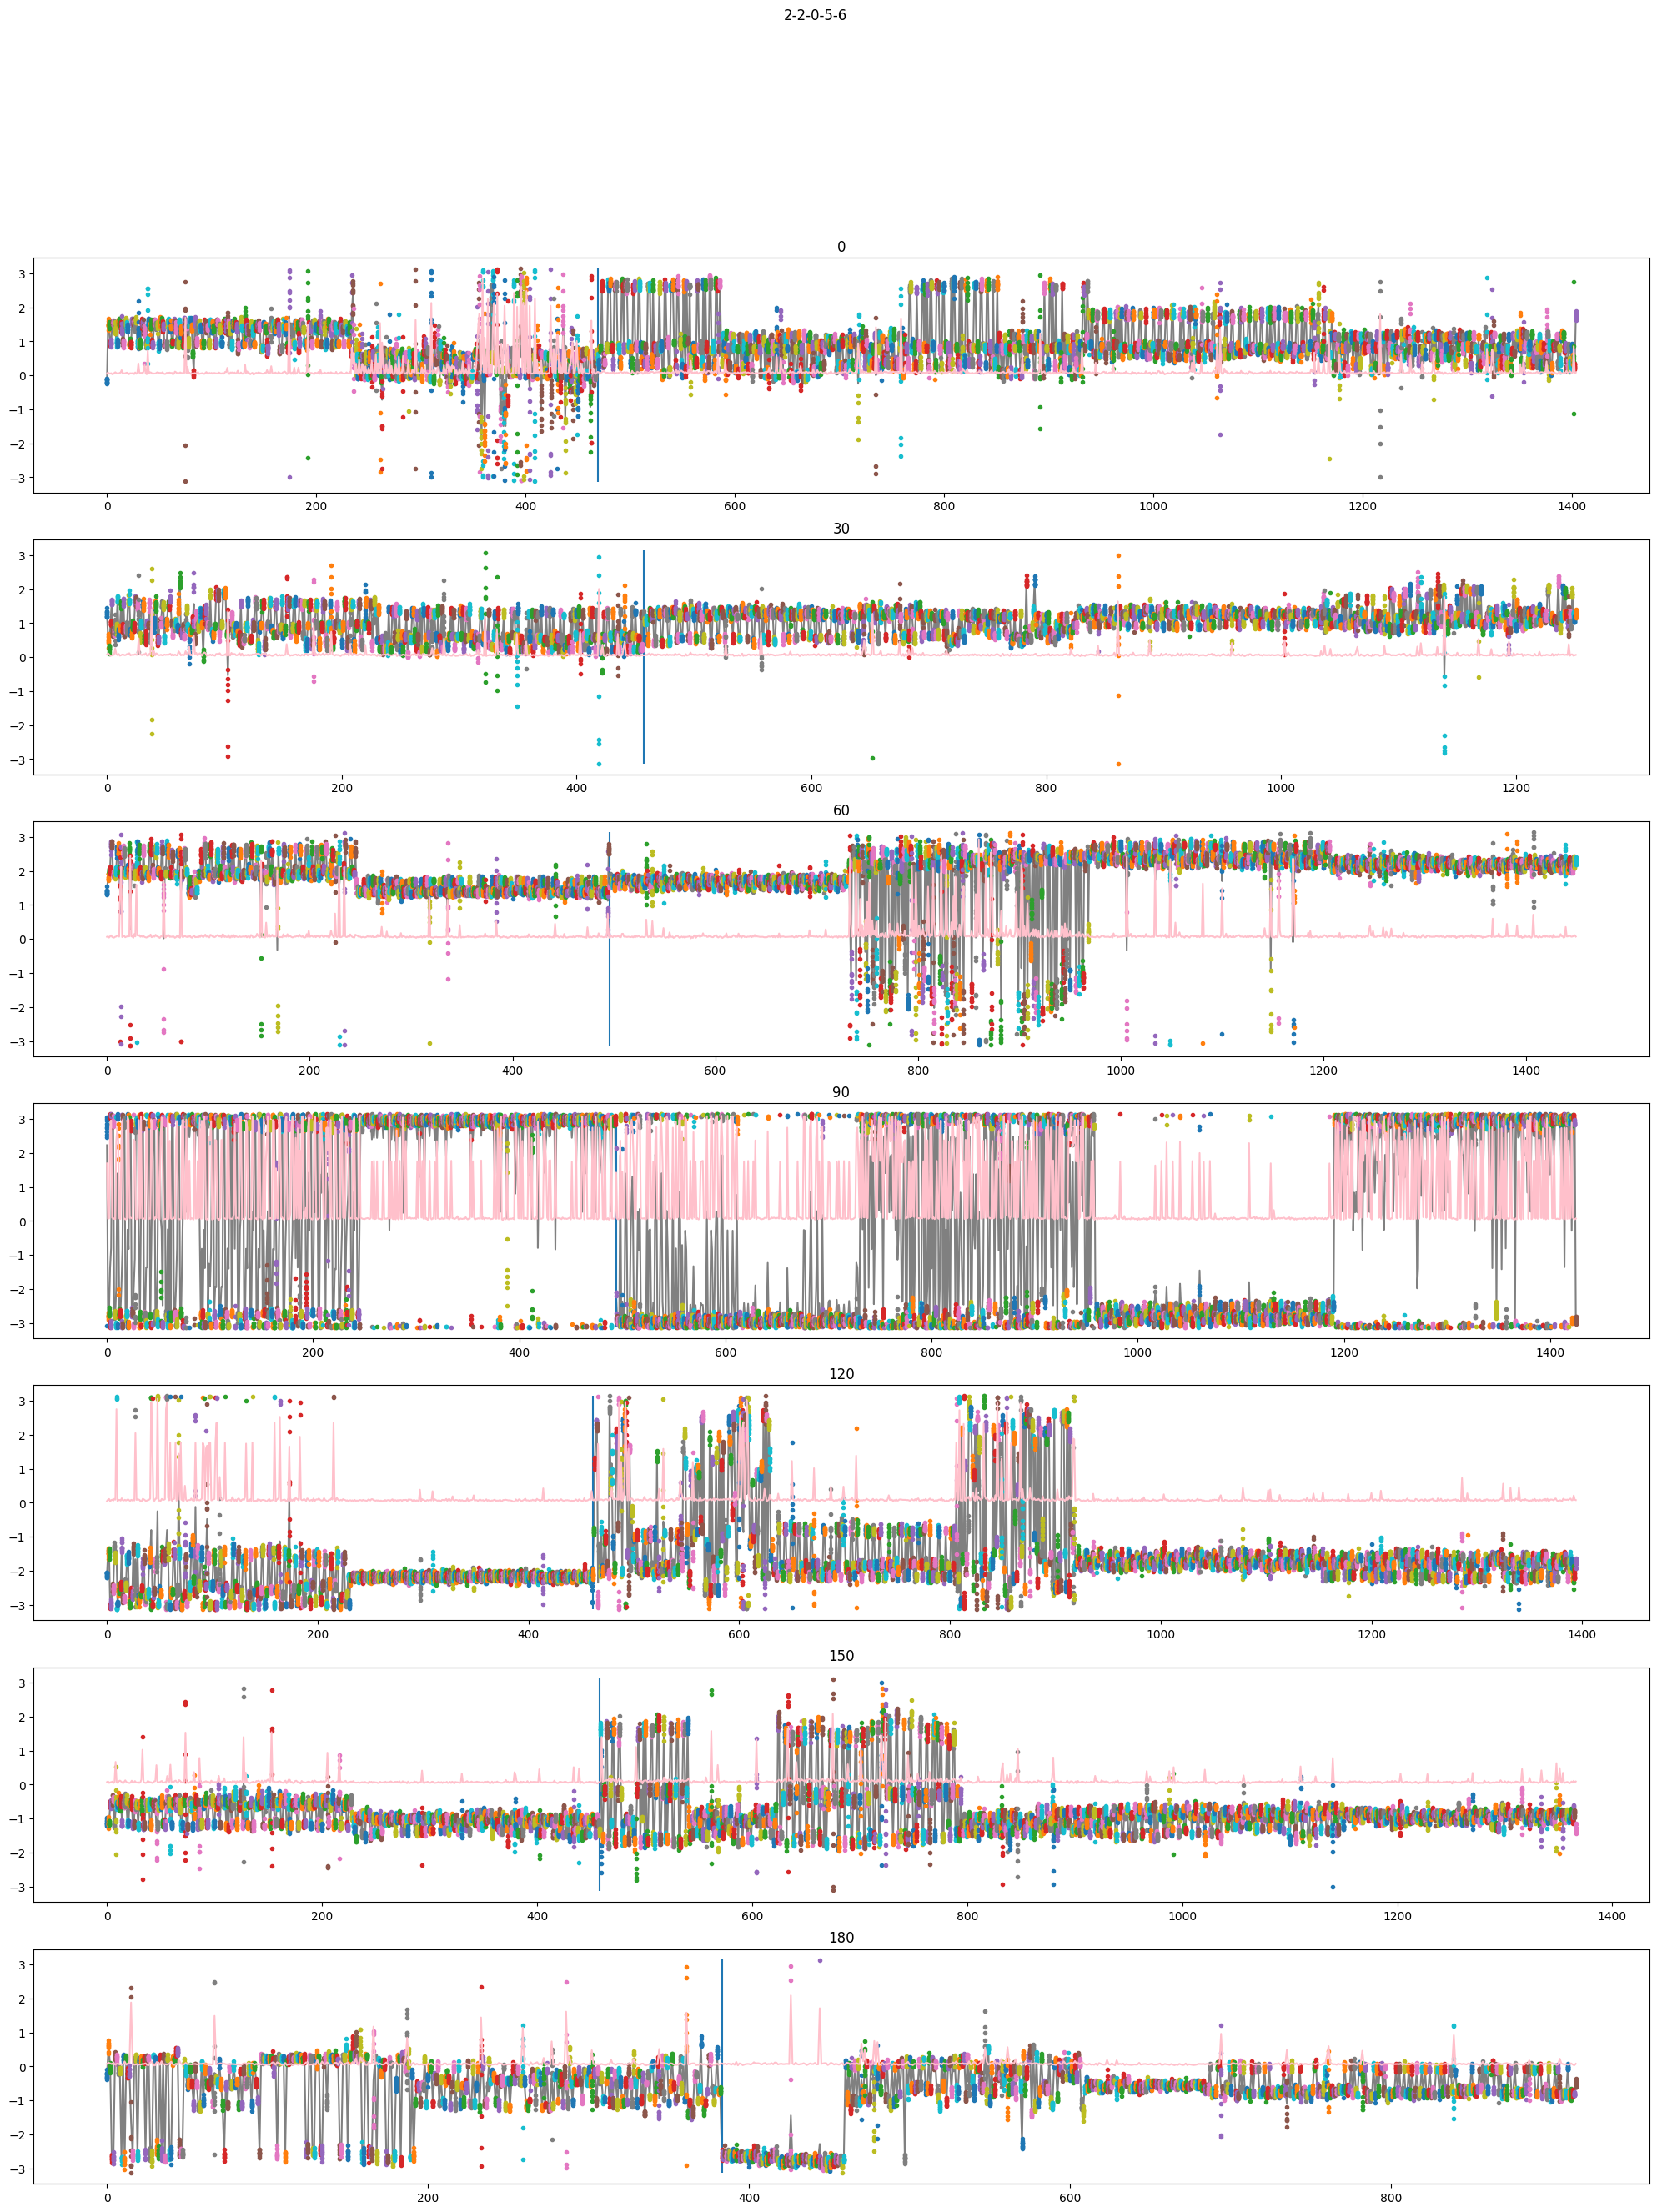

In [69]:
fig, ax = plt.subplots(7,1)
fig.set_figwidth(25)
fig.set_figheight(30)
fig.suptitle(antenna_conf)


for index,angle in enumerate((0,30,60,90,120,150,180)):
    d=data[data["Angle"] == angle].sort_values("TAG").reset_index()
    ab= d[d["TAG"] == "B"].index[0]
    #cb= d[d["TAG"] == "C"].index[0]

    d= d["fases_50"]
    d= [np.mean(item) for item in d]
    ax[index].plot(d,"gray")
    ax[index].set_title(str(angle))
    ax[index].vlines(ab,-np.pi,np.pi)
    #ax[index].vlines(cb,-np.pi,np.pi)

for index,angle in enumerate((0,30,60,90,120,150,180)):
    d=data[data["Angle"] == angle].sort_values("TAG").reset_index()
    ab= d[d["TAG"] == "B"].index[0]
    #cb= d[d["TAG"] == "C"].index[0]

    d= d["fases_50"]

    for de, i in zip(d,range(d.shape[0])):
        ax[index].plot([i]*len(de),de,".")

for index,angle in enumerate((0,30,60,90,120,150,180)):
    d=data[data["Angle"] == angle].sort_values("TAG").reset_index()
    ab= d[d["TAG"] == "B"].index[0]
    #cb= d[d["TAG"] == "C"].index[0]

    d= d["fases_50"]
    d= [np.std(item) for item in d]
    ax[index].plot(d,"pink")


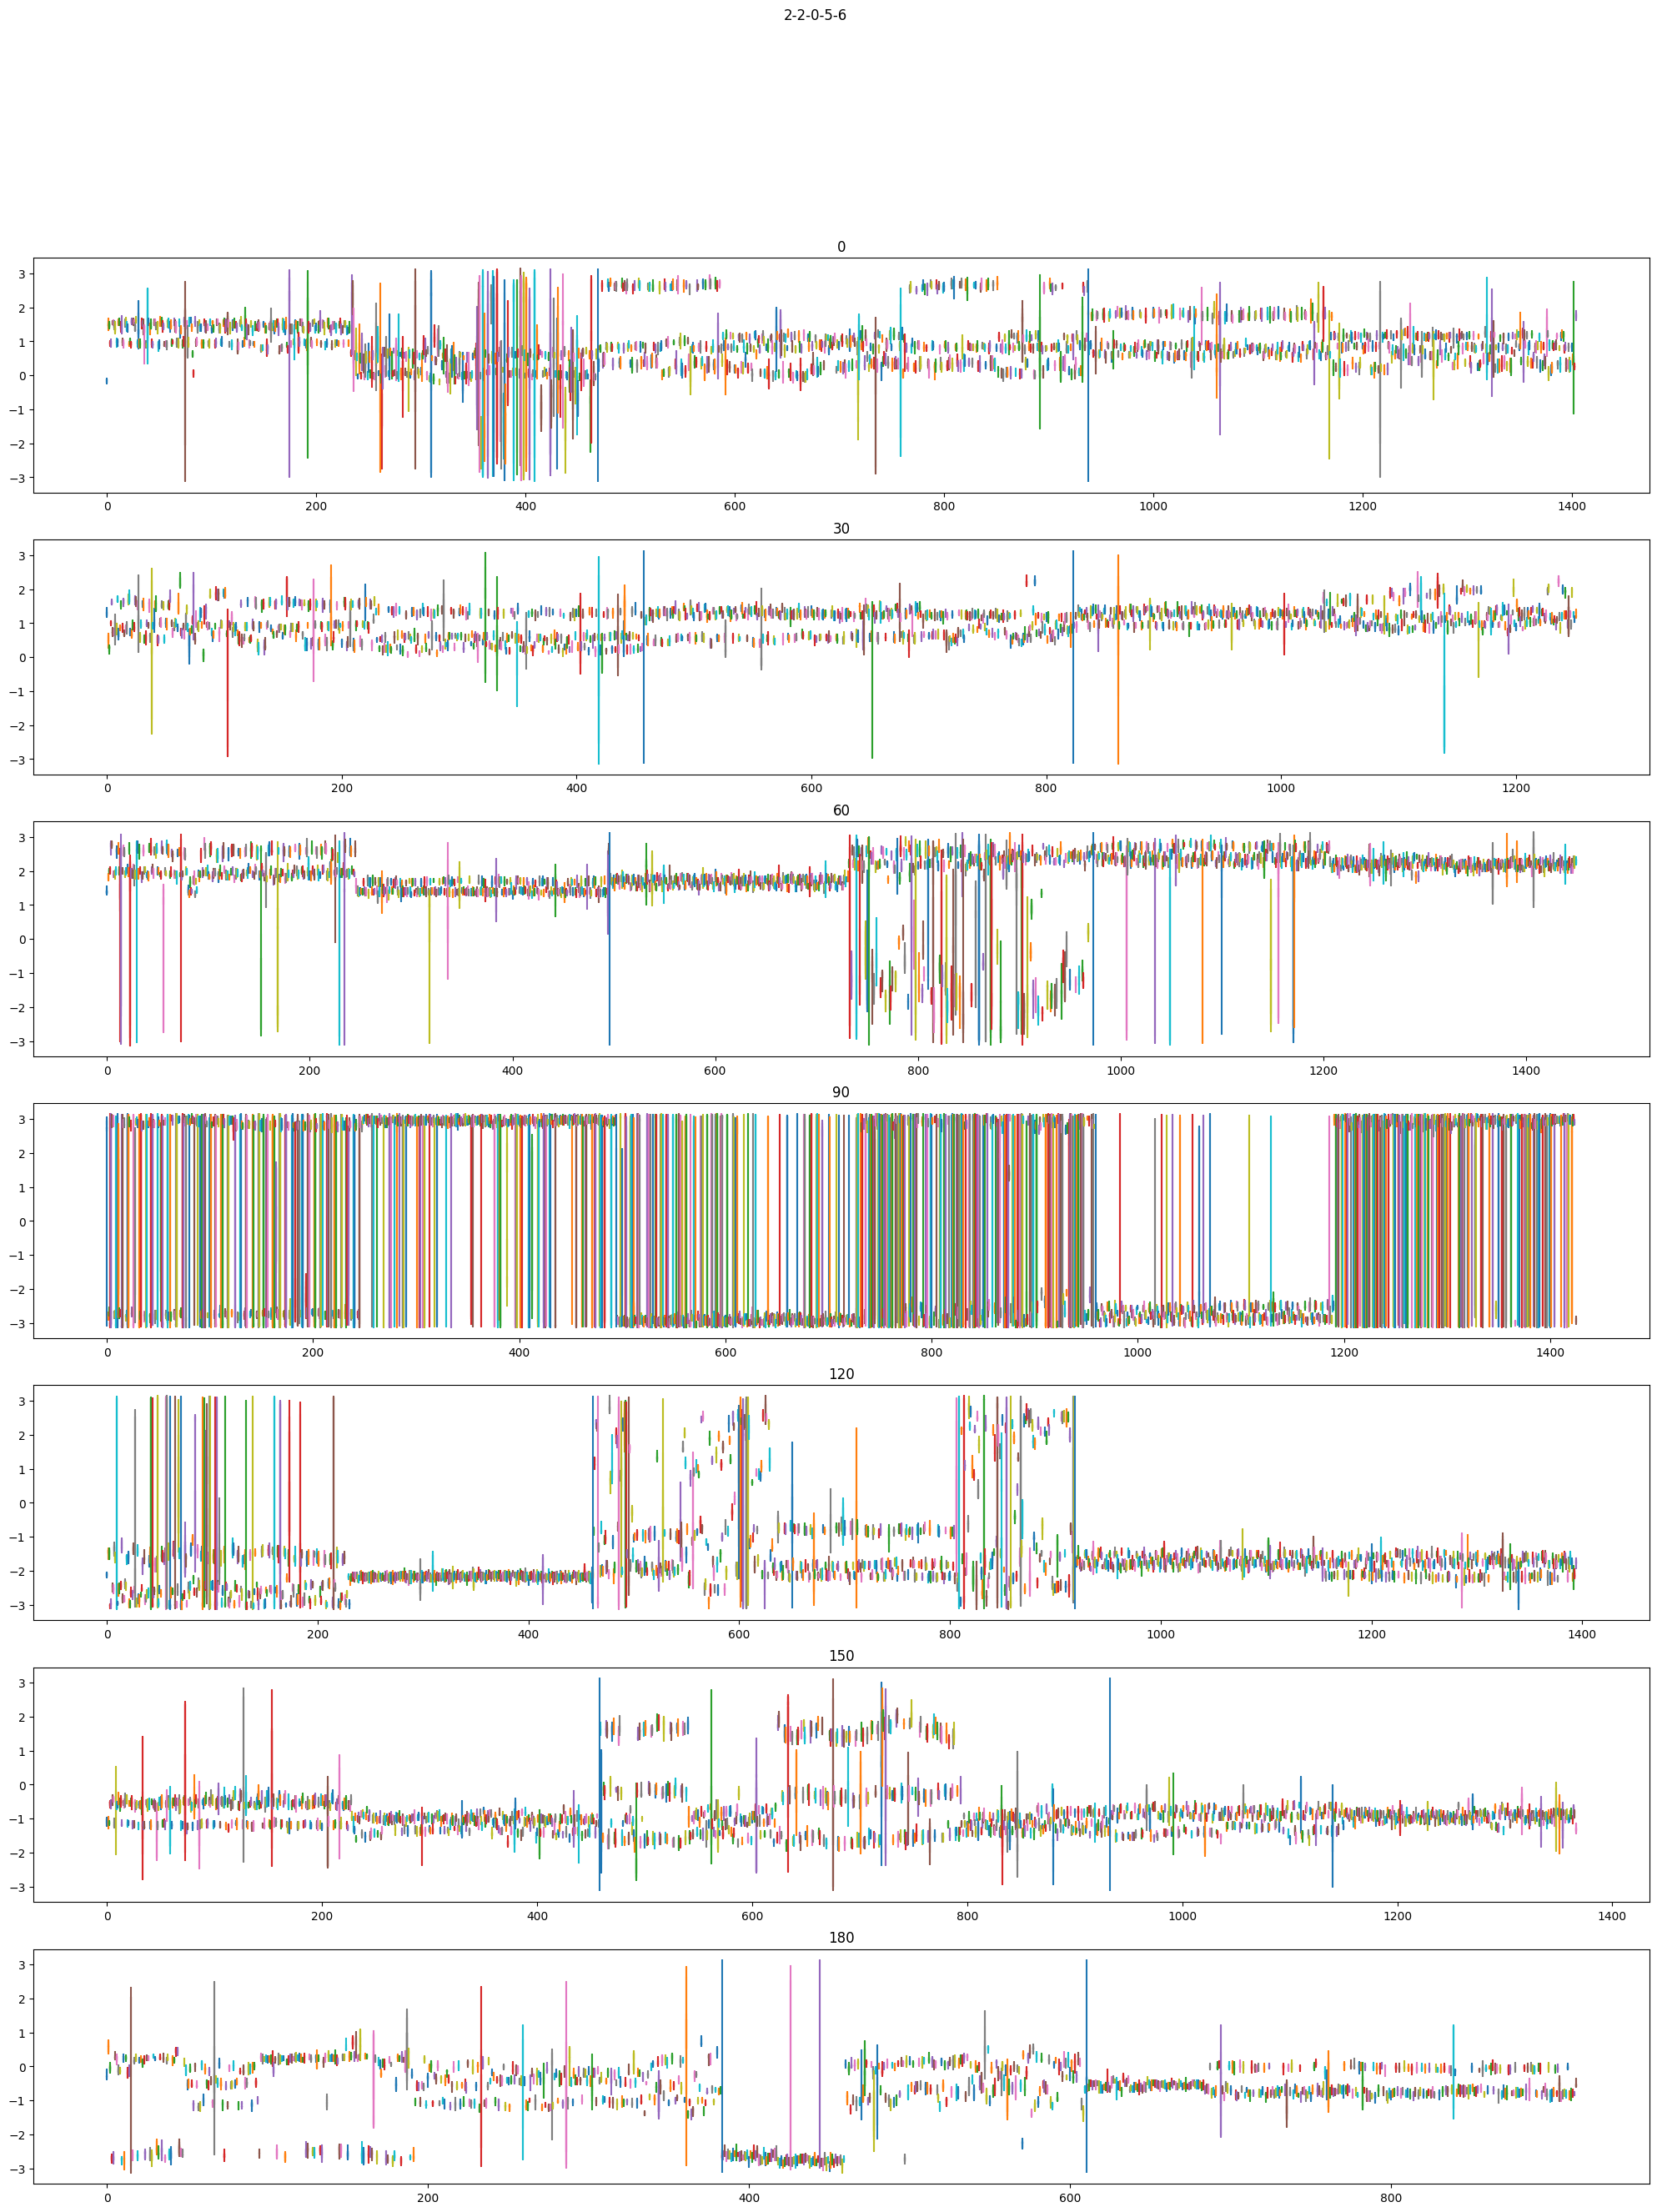

In [70]:
fig, ax = plt.subplots(7,1)
fig.set_figwidth(25)
fig.set_figheight(30)
fig.suptitle(antenna_conf)

for index,angle in enumerate((0,30,60,90,120,150,180)):
    d=data[data["Angle"] == angle].sort_values("TAG").reset_index()
    ab= d[d["TAG"] == "B"].index[0]
    cb= d[d["TAG"] == "C"].index[0]

    d= d["fases_50"]

    for de, i in zip(d,range(d.shape[0])):
        ax[index].plot([i]*len(de),de,)
    ax[index].set_title(str(angle))
    ax[index].vlines(ab,-np.pi,np.pi)
    ax[index].vlines(cb,-np.pi,np.pi)


